# TP5 - Visualisation sous `Python` - *correction*

#### Analyse de Données Massives - Master 1ère année

In [2]:
from pydataset import data

import numpy
import pandas

from bokeh.plotting import output_notebook, show
from bokeh.charts import color, Histogram, BoxPlot, Bar, Donut, Scatter, HeatMap, bins
from bokeh import layouts
output_notebook()

import seaborn

%matplotlib inline

Loading BokehJS ...


## A faire 



A partir du jeu de données `Computers` présent dans le module `pydataset`, vous devez répondre aux questions suivantes, avec `bokeh` et `seaborn`. Vous pourrez trouver des informations sur ce jeu de données en exécutant `data("Computers", show_doc = True)` dans le *notebook*.

In [4]:
ordis = data("Computers")

1. Représenter graphiquement la variable `price` (histogramme, boîte à moustaches, ...)
1. Représenter le lien entre la variable `price` et les variables
    - `speed`
    - `hd`
    - `ram`
    - `cd`
    - `premium`
    - `screen`
1. Représenter sur `price` l'impact de ces couples de variables
    - `speed` et `hd`
    - `hd` et `screen`
    - `speed` et `premium`
    - `hd` et `premium`
1. Proposer des représentations graphiques, toujours pour décrire `price` en fonction d'autres variables, mais prenant en compte plus de trois variables

### `anscombe`

Représenter sur un même graphique (avec un découpage donc) les quatre séries des données `anscombe`.

In [3]:
anscombe = data("anscombe")

In [4]:
from functools import reduce
ans_bis = reduce(lambda a,b: pandas.concat([a, b]),
                 [pandas.DataFrame({"x": anscombe["x" + j], 
                                    "y": anscombe["y" + j], 
                                    "i": j}) 
                  for j in [str(i) for i in range(1, 5)]]).reset_index()

#### Avec `bokeh`

In [5]:
p = layouts.gridplot(*[Scatter(ans_bis.query("i == '" + str(i+1) + "'"), "x", "y") 
                       for i in range(4)], ncols=2,
                     plot_width = 300, plot_height = 200)
show(p)

#### Avec `seaborn`

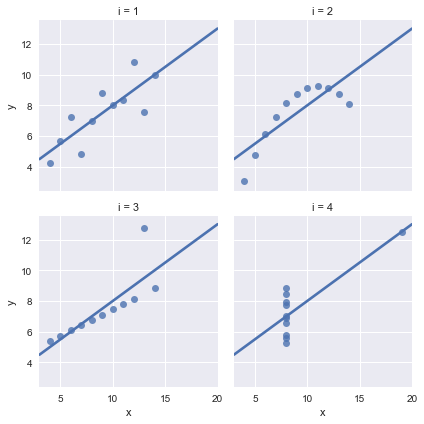

In [8]:
p = seaborn.FacetGrid(ans_bis, col = "i", col_wrap = 2)
p.set(xlim = (ans_bis.x.min() - 1, ans_bis.x.max() + 1))
p.map(seaborn.regplot, "x", "y", ci = False)